### Car Price Prediction using Machine Learning
Table of content:

1. Importing libraries
2. Reading dataset
3. Data Preprocessing
* Checking missing values
* Checking for Unique values
4. Exploratory Data Analysis
* Visualization
* Looking for extreme high data entry
* Understanding relationship between features
5. Model Building
* Creating dummy variables
* Feature Importance
* Linear Regression


In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [228]:
# reading the data package
data = pd.read_csv(r'C:\Users\arieh\OneDrive\Documents\Arieh\snap folder\intro to data science\matala\final project\archive (1)\Car details v3.csv')

In [229]:
# displaying the data maximum columns.
pd.set_option('display.max_columns',None)
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### Feature explanation:
1. name - name of the car
2. year - year in which car was bought
3. selling price - selling price of the car
4. km driven - number of kilometers the car is driven
5. fuel - fuel type of the car
6. seller type - tells if car is sold by individual or dealer
7. transmission - Gear transmission of the car (Automatic/Manual)
8. owner - number of previous owners.
9. mileage - mileage of the car
10. engine - engine capacity of the car
11. max power - max power of engine
12. torque - torque of the car
13. seats - number of seats in the car

In [230]:
data.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [231]:
data.shape

(8128, 13)

we have 8128 cars, and 13 columns. 

In [232]:
# checking for missing values.
data.isnull()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,False,False,False,False,False,False,False,False,False,False,False,False,False
8124,False,False,False,False,False,False,False,False,False,False,False,False,False
8125,False,False,False,False,False,False,False,False,False,False,False,False,False
8126,False,False,False,False,False,False,False,False,False,False,False,False,False


In [233]:
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

checking missing values perctile

In [234]:
data.isnull().sum() / data.shape[0] * 100

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.718996
engine           2.718996
max_power        2.645177
torque           2.731299
seats            2.718996
dtype: float64

we can see that we have more than 97% of our data isn't missing which is a great start. lets check if we have any duplicates. 

In [235]:
data.duplicated().any()

True

I will already remove duplicates since i dont need them now or after, and we will see how our shape changes. 

In [236]:
data = data.drop_duplicates()
data.shape

(6926, 13)

we had before 8128 and now we have 6926 rows, we got rid of 1202 duplicates.

In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   year           6926 non-null   int64  
 2   selling_price  6926 non-null   int64  
 3   km_driven      6926 non-null   int64  
 4   fuel           6926 non-null   object 
 5   seller_type    6926 non-null   object 
 6   transmission   6926 non-null   object 
 7   owner          6926 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6721 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 757.5+ KB


In [238]:
data.describe()

,year,selling_price,km_driven,seats
count,6926.000000,6.926000e+03,6.926000e+03,6718.000000
mean,2013.420300,5.172707e+05,7.399568e+04,5.434653
std,4.078286,5.197670e+05,5.835810e+04,0.984230
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.500000e+05,4.000000e+04,5.000000
50%,2014.000000,4.000000e+05,7.000000e+04,5.000000
75%,2017.000000,6.335000e+05,1.000000e+05,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


only the numeric value feature are shown for now, we will change the object type when we start cleaning the data. 

In [239]:
#Cheching for unique values in different coloumns
print("Fuel type:-", data['fuel'].unique())
print("Seller:-", data['seller_type'].unique())
print("Transmission:-", data['transmission'].unique())
print("Owner:-", data['owner'].unique())
print("Year:-",data['year'].unique())
print("Seats",data['seats'].unique())

Fuel type:- ['Diesel' 'Petrol' 'LPG' 'CNG']
Seller:- ['Individual' 'Dealer' 'Trustmark Dealer']
Transmission:- ['Manual' 'Automatic']
Owner:- ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
Year:- [2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2003 2019 2008 2020 1999 2000 1983 2004 1996 1994 1995 1998 1997
 1991]
Seats [ 5.  4. nan  7.  8.  6.  9. 10. 14.  2.]


In [240]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

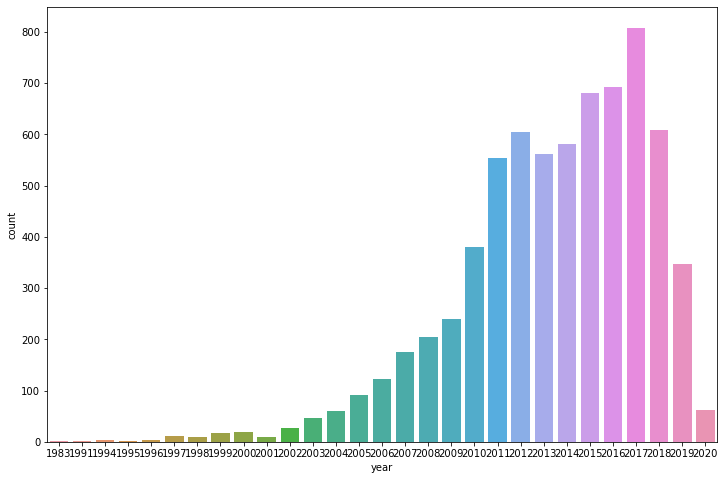

In [241]:
plt.figure(figsize=[12,8])
sns.countplot(x='year',data=data)

The plot above shows the amount of cars from each year.

In [242]:
# Adding a new coloum to our dataset called vehicle_age
data['vehicle_age']=2021-data['year']

In [243]:
# Droping the year coloum from our dataset
data.drop(['year'],axis=1,inplace=True)

In [244]:
data.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,vehicle_age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,7
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,15
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,11
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,14


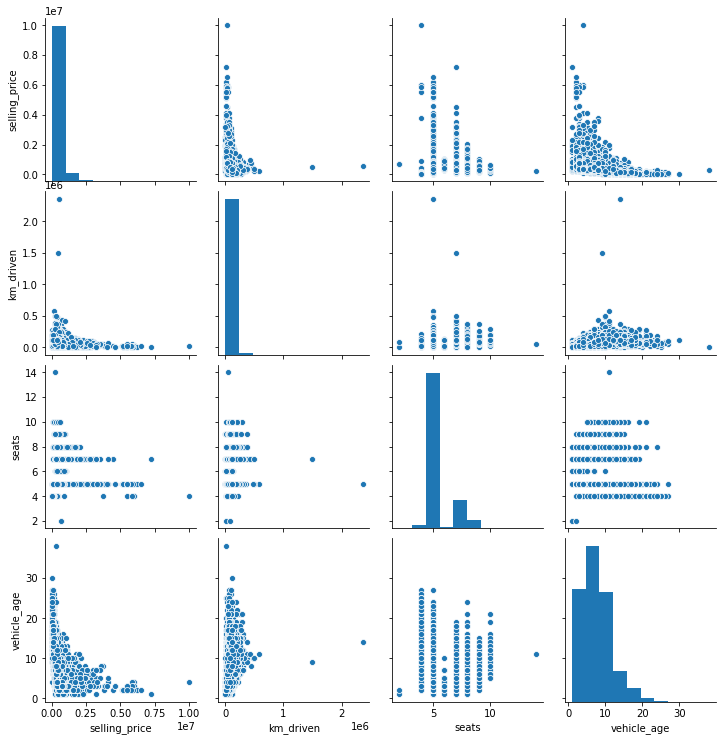

In [245]:
sns.pairplot(data)

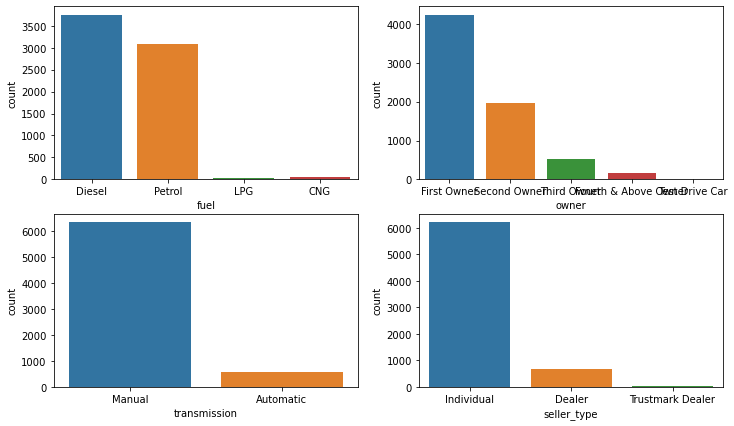

In [246]:
plt.figure(figsize=[12,7])
plt.subplot(2,2,1)
sns.countplot(x='fuel',data=data)
plt.subplot(2,2,2)
sns.countplot(x='owner',data=data)

plt.subplot(2,2,3)
sns.countplot(x='transmission',data=data)
plt.subplot(2,2,4)
sns.countplot(x='seller_type',data=data)
plt.show()

From the above count plots we can get to know various information like:-
1. How many petrol,disesl and cng cars are there.
2. Number of cars for different Owners.
3. How many manual and automatic cars are there.
4. Count of numbers of sellers type.

In [247]:
# changing the owner to numeric value 
data['owner'] = data['owner'].replace({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4
})
data.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,vehicle_age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,7
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,15
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,11
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,14


In [248]:
# cleaning the rest of the data by removing the string vlaue 
data['mileage'] = data['mileage'].str.strip('kmpl').str.strip('km/kg')
data['engine'] = data['engine'].str.strip('CC')
data['max_power'] = data['max_power'].str.strip('bhp').str.strip()
data['mileage'] = pd.to_numeric(data['mileage'])
data['engine'] = pd.to_numeric(data['engine'])
data['max_power'] = pd.to_numeric(data['max_power'])
data.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,vehicle_age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,7
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,15
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,11
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,14


In [249]:
# cleaning the data to improve my exploration.\
# i dropped torque, since most people dont buy a car according to torque or even know what torque is. 
data.drop(['torque'],axis=1, inplace = True)
data.dropna(axis=0, inplace=True)
data.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,vehicle_age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0,7
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0,15
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0,11
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0,14


In [250]:
data.shape

(6717, 12)

### Checking relationship between features

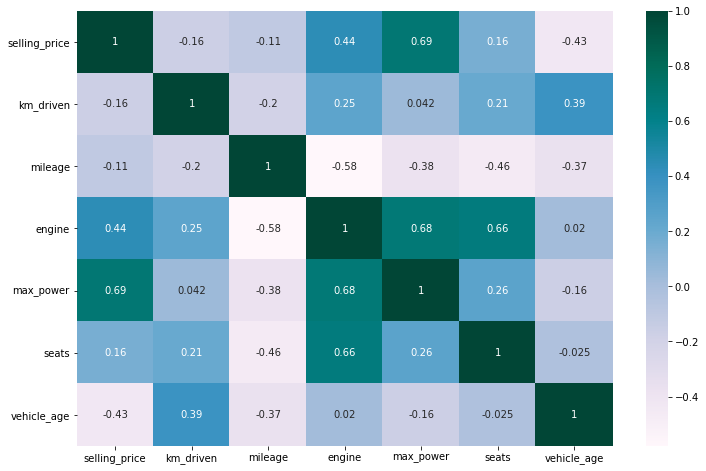

In [251]:
plt.figure(figsize=[12,8])
sns.heatmap(data.corr(),annot=True,cmap='PuBuGn')

A negative corelation is an inverse corealtion meaning, when one goes up the other goes doewn and when one goes down the other can go up. 

### Visualizing selling price relationship with other features

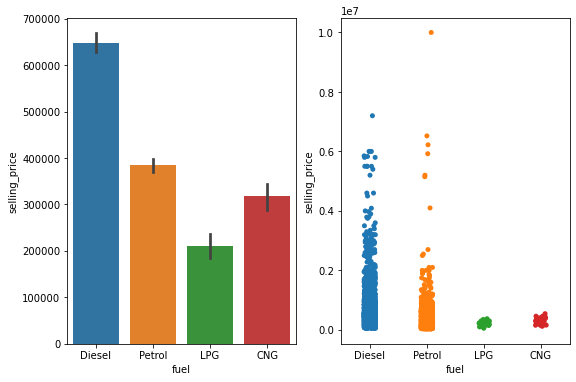

In [252]:
plt.figure(figsize=[9,6])
plt.subplot(1,2,1)
sns.barplot(x='fuel',y='selling_price',data=data)
plt.subplot(1,2,2)
sns.stripplot(x='fuel',y='selling_price',data=data)

We can say that Diesel cars have higher selling price than Petrol and CNG cars.

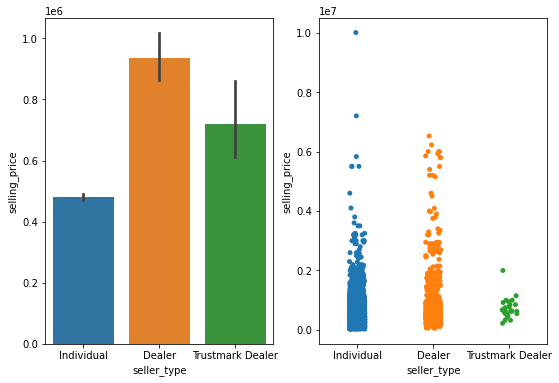

In [253]:
plt.figure(figsize=[9,6])
plt.subplot(1,2,1)
sns.barplot(x='seller_type',y='selling_price',data=data)
plt.subplot(1,2,2)
sns.stripplot(x='seller_type',y='selling_price',data=data)

From the graphs we can infer that the dealers are earning more money than the individual sellers as dealers are getting more selling price.

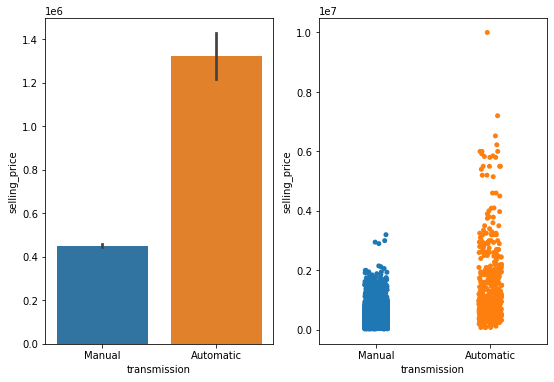

In [254]:
plt.figure(figsize=[9,6])
plt.subplot(1,2,1)
sns.barplot(x='transmission',y='selling_price',data=data)
plt.subplot(1,2,2)
sns.stripplot(x='transmission',y='selling_price',data=data)

From the above graphs, we can conclude that people prefer Automatic cars over Manual cars hence they have a high selling price.

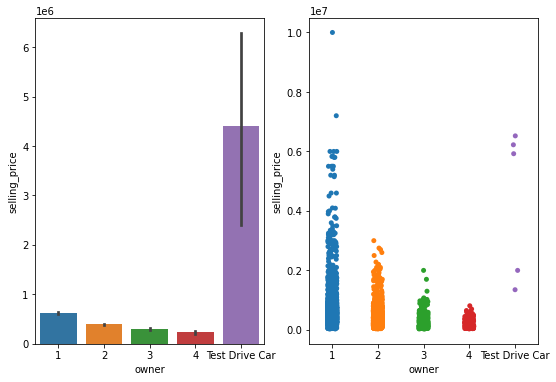

In [255]:
plt.figure(figsize=[9,6])
plt.subplot(1,2,1)
sns.barplot(x='owner',y='selling_price',data=data)
plt.subplot(1,2,2)
sns.stripplot(x='owner',y='selling_price',data=data)

From the above graphs, we can see that the more owerns the car had, the more the value decreased.

### Building the model

In [256]:
# dropping the cars name, since it doesnt add input to how much the car is worth. 
# make a copy of the data 
# Make a copy of the data for modelling
data_model = data.drop(['name'],inplace=True,axis=1)
data_model=pd.get_dummies(data,drop_first=True)

In [257]:
data_model.head()

,selling_price,km_driven,mileage,engine,max_power,seats,vehicle_age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_2,owner_3,owner_4,owner_Test Drive Car
0,450000,145500,23.40,1248.0,74.00,5.0,7,1,0,0,1,0,1,0,0,0,0
1,370000,120000,21.14,1498.0,103.52,5.0,7,1,0,0,1,0,1,1,0,0,0
2,158000,140000,17.70,1497.0,78.00,5.0,15,0,0,1,1,0,1,0,1,0,0
3,225000,127000,23.00,1396.0,90.00,5.0,11,1,0,0,1,0,1,0,0,0,0
4,130000,120000,16.10,1298.0,88.20,5.0,14,0,0,1,1,0,1,0,0,0,0


### Train Test Split

In [258]:
x = data_model.drop(['selling_price'],axis=1)
y = data_model['selling_price']

In [259]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4701, 16)
x test:  (2016, 16)
y train:  (4701,)
y test:  (2016,)


### Linear regression

In [260]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [261]:
# predicting value using linear regression
y_pred=lr.predict(x_test)

In [262]:
from sklearn.metrics import r2_score
lr_r2=r2_score(y_test, y_pred)
print(lr_r2)

0.6254065233153712


as we can see without tweaking the data so much we get a low result, lets see if we can make it higher. 

### Tuning the data

In [275]:
data=pd.get_dummies(data,drop_first=True)
data.head()

,selling_price,km_driven,mileage,engine,max_power,seats,vehicle_age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_2,owner_3,owner_4,owner_Test Drive Car
0,450000,145500,23.40,1248.0,74.00,5.0,7,1,0,0,1,0,1,0,0,0,0
1,370000,120000,21.14,1498.0,103.52,5.0,7,1,0,0,1,0,1,1,0,0,0
2,158000,140000,17.70,1497.0,78.00,5.0,15,0,0,1,1,0,1,0,1,0,0
3,225000,127000,23.00,1396.0,90.00,5.0,11,1,0,0,1,0,1,0,0,0,0
4,130000,120000,16.10,1298.0,88.20,5.0,14,0,0,1,1,0,1,0,0,0,0


In [276]:
# demonstrate data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# load data
Sdata = data
# create scaler
scaler = MinMaxScaler()
# fit and transform in one step
normalized = scaler.fit_transform(Sdata)

In [278]:
normalized.shape

(6717, 17)

In [280]:
normalized

array([[0.04212648, 0.06164021, 0.55714286, ..., 0.        , 0.        ,
        0.        ],
       [0.0341024 , 0.05083721, 0.50333333, ..., 0.        , 0.        ,
        0.        ],
       [0.01283861, 0.05931015, 0.42142857, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.02908736, 0.04660074, 0.44047619, ..., 0.        , 0.        ,
        0.        ],
       [0.01053169, 0.05041356, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.03530601, 0.05083721, 0.45952381, ..., 0.        , 0.        ,
        0.        ]])

In [297]:
dataset = pd.DataFrame({'selling_price': normalized[:, 0], 'km_driven': normalized[:, 1], 'mileage': normalized[:, 2], 'engine': normalized[:,3], 'max_power': normalized[:,4], 
                        'seats': normalized[:, 5], 'vehicle_age': normalized[:,6], 'fuel_Diesel': normalized[:,7], 'fuel_LPG': normalized[:,8], 'fuel_Petrol': normalized[:,9],
                       'seller_type_Individual': normalized[:,10], 'seller_type_Trustmark Dealer': normalized[:,11], 'transmission_Manual': normalized[:,12], 
                        'owner_2': normalized[:,13], 'owner_3': normalized[:,14], 'owner_4': normalized[:,15], 'owner_Test Drive Car': normalized[:,16]})
dataset.head()

,selling_price,km_driven,mileage,engine,max_power,seats,vehicle_age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_2,owner_3,owner_4,owner_Test Drive Car
0,0.042126,0.061640,0.557143,0.209396,0.112200,0.25,0.230769,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.034102,0.050837,0.503333,0.293289,0.192593,0.25,0.230769,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.012839,0.059310,0.421429,0.292953,0.123094,0.25,0.538462,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.019559,0.053803,0.547619,0.259060,0.155773,0.25,0.384615,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.010030,0.050837,0.383333,0.226174,0.150871,0.25,0.500000,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [288]:
x = dataset.drop(['selling_price'],axis=1)
y = dataset['selling_price']

In [289]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4701, 16)
x test:  (2016, 16)
y train:  (4701,)
y test:  (2016,)


In [293]:
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression()

In [294]:
# predicting value using linear regression
y_pred=lr1.predict(x_test)

In [296]:
from sklearn.metrics import r2_score
lr1_r2=r2_score(y_test, y_pred)
print(lr1_r2)

0.6254065233153243


In [300]:
# k-fold CV (using all the 5 variables)
lm = LinearRegression()
scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=5)
scores     

array([0.65345377, 0.65076383, 0.69554546, 0.57258861, 0.57739399])